In [7]:
import pandas as pd
import numpy as nmp
import requests
import os
import json
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geodatasets import get_path
import plotly.express as px

In [2]:
root = 'https://coast.noaa.gov/arcgis/rest/services/Hosted/ArtificialReefs/FeatureServer/0/query'

In [3]:
parameters = {
    'where': '1=1',                
    'outFields': '*',               
    'outSR': '4326',                
    'f': 'json'                     
}

In [4]:
r = requests.get('http://httpbin.org/user-agent')
useragent = json.loads(r.text)['user-agent']
headers = {'User-Agent': useragent,
           'From': 'zrc3hc@virginia.edu'}

In [5]:
r = requests.get(root, params=parameters, headers=headers)

In [6]:
data = r.json()

features = data['features']
records = [feature['attributes'] for feature in features]
df = pd.DataFrame(records)
df


,longitudedms,reefcomposition,waterdepthfeet,latitudedms,reefname,objectid
0,67 11 17.5 W,"Cement, sand and gravel",4,18 6 57.6 N,Ratones,1
1,67 3 21.6 W,"Cement, sand and gravel",15,17 57 8.9 N,El Mario,2
2,66 54 17.0 W,"Cement, sand and gravel",10,17 57 11.2 N,Jaboncillo,3
3,66 51 16.3 W,"Cement, sand and gravel",10,17 57 22.2 N,Atolladora,4
4,66 50 48.6 W,"Cement, sand and gravel",8,17 57 10.0 N,Tamarindo,5
...,...,...,...,...,...,...
1995,82 35 58.3 W,"1 Pallet Ball and 5 Bay Balls , funded by Eter...",30,27 17 9.4 N,"I-1, Lynn Silvertooth, 24-25",1992
1996,82 35 58.3 W,12 Modules - 11 Bay Balls and 1 Pallet Ball,30,27 17 9.6 N,"I-1, Lynn Silvertooth, 25",1993
1997,82 35 58.2 W,1 Pallet Ball and 3 Bay Balls,30,27 17 10.7 N,"I-1, Lynn Silvertooth, 25",1994
1998,82 35 57.5 W,5 Pallet Balls and 1 Bay Ball,30,27 17 8.8 N,"I-1, Lynn Silvertooth, 25-15",1995


In [7]:
def dms_to_decimal(dms):
    parts = dms.split()
    degrees, minutes, seconds, direction = float(parts[0]), float(parts[1]), float(parts[2]), parts[3]
    decimal = degrees + minutes / 60 + seconds / 3600
    if direction in ['S', 'W']:
        decimal = -decimal
    return decimal

df['latitude_decimal'] = df['latitudedms'].apply(dms_to_decimal)
df['longitude_decimal'] = df['longitudedms'].apply(dms_to_decimal)
df

,longitudedms,reefcomposition,waterdepthfeet,latitudedms,reefname,objectid,latitude_decimal,longitude_decimal
0,67 11 17.5 W,"Cement, sand and gravel",4,18 6 57.6 N,Ratones,1,18.116000,-67.188194
1,67 3 21.6 W,"Cement, sand and gravel",15,17 57 8.9 N,El Mario,2,17.952472,-67.056000
2,66 54 17.0 W,"Cement, sand and gravel",10,17 57 11.2 N,Jaboncillo,3,17.953111,-66.904722
3,66 51 16.3 W,"Cement, sand and gravel",10,17 57 22.2 N,Atolladora,4,17.956167,-66.854528
4,66 50 48.6 W,"Cement, sand and gravel",8,17 57 10.0 N,Tamarindo,5,17.952778,-66.846833
...,...,...,...,...,...,...,...,...
1995,82 35 58.3 W,"1 Pallet Ball and 5 Bay Balls , funded by Eter...",30,27 17 9.4 N,"I-1, Lynn Silvertooth, 24-25",1992,27.285944,-82.599528
1996,82 35 58.3 W,12 Modules - 11 Bay Balls and 1 Pallet Ball,30,27 17 9.6 N,"I-1, Lynn Silvertooth, 25",1993,27.286000,-82.599528
1997,82 35 58.2 W,1 Pallet Ball and 3 Bay Balls,30,27 17 10.7 N,"I-1, Lynn Silvertooth, 25",1994,27.286306,-82.599500
1998,82 35 57.5 W,5 Pallet Balls and 1 Bay Ball,30,27 17 8.8 N,"I-1, Lynn Silvertooth, 25-15",1995,27.285778,-82.599306


In [8]:
df.to_csv("marine_reefs_data.csv", index=True)

In [10]:
gdf = gpd.GeoDataFrame(
    df, geometry = gpd.points_from_xy(df.longitude_decimal, df. latitude_decimal), crs = "EPSG: 4326")


In [14]:
gdf.drop(['longitudedms', 'latitudedms'], axis = 1, inplace = True)

In [16]:
gdf.to_file('Reefs/reefs.shp')  

/tmp/ipykernel_12206/2665442416.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('Reefs/reefs.shp')


<Axes: >

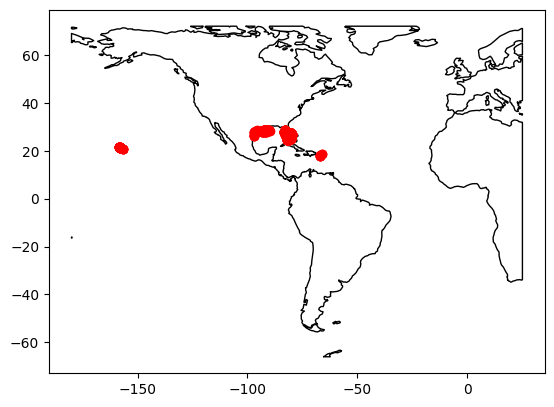

In [9]:
world = gpd.read_file(get_path("naturalearth.land"))
ax = world.clip([-180, -66, 25, 72]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color = "red")

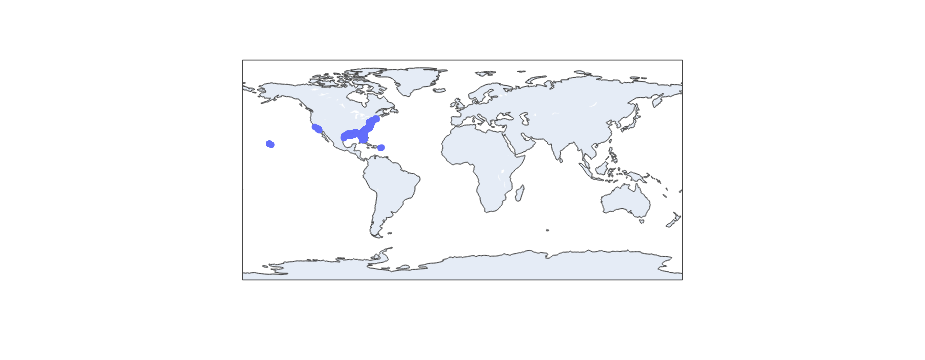

In [15]:
gdf = gpd.read_file('reefs_info/ArtificialReef.gpkg')
fig = px.scatter_geo(gdf,
                    lat = gdf.geometry.y,
                    lon = gdf.geometry.x)
fig.show()

In [16]:
gdf.head(2)

,reefIdentifier,reefName,reefComposition,reefStructure,reefYear,stateAbbreviation,depthFromBathymetry,waterDepthFeet,latitudeDMS,longitudeDMS,geometry
0,None,Ratones,"Cement, sand and gravel","Taino Reefs (concrete coral-like structures), ...",2001.0,PR,None,4.0,18 6 57.6 N,67 11 17.5 W,POINT (-67.18818 18.11600)
1,None,El Mario,"Cement, sand and gravel",Bay Ball (Reef ball) 1 module,2001.0,PR,None,15.0,17 57 8.9 N,67 3 21.6 W,POINT (-67.05599 17.95249)
